In [20]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=2, cluster_std=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('训练数据集形态:', X_train_scaled.shape,
      '\n测试数据集形态:', X_test_scaled.shape)

训练数据集形态: (150, 2) 
测试数据集形态: (50, 2)


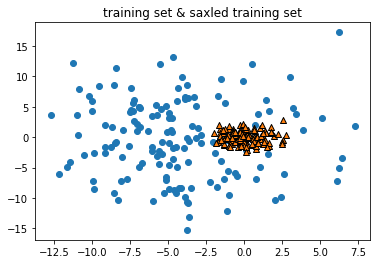

In [21]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], marker='^', edgecolors='k')

plt.title('training set & saxled training set')
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':[(50,), (100,), (100, 100)],
          'alpha':[0.0001, 0.001, 0.01, 0.1]}

grid = GridSearchCV(MLPClassifier(max_iter=1600, random_state=38), param_grid=params, cv = 3)

grid.fit(X_train_scaled, y_train)

print('模型最佳得分:{:.2f}'.format(grid.best_score_))
print('模型最佳参数:{}'.format(grid.best_params_))

模型最佳得分:0.77
模型最佳参数:{'alpha': 0.0001, 'hidden_layer_sizes': (50,)}


In [23]:

print('测试集得分:{:.2f}'.format(grid.score(X_test_scaled, y_test)))

测试集得分:0.84


In [24]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('sealer', StandardScaler()), ('mlp', MLPClassifier())])

pipeline.fit(X_train, y_train)
print('使用管道的MLP模型评分:{:.2f}'.format(pipeline.score(X_test, y_test)))


使用管道的MLP模型评分:0.84


D:\RJAZ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
params = {'mlp__hidden_layer_sizes':[(50, ), (100, ), (100, 100)], 
          'mlp__alpha':[0.0001, 0.001, 0.01, 0.1]}

grid = GridSearchCV(pipeline, param_grid=params, cv = 3)
grid.fit(X_train, y_train)
print('交叉验证最高得分:{:.2f}'.format(grid.best_score_))
print('模型最优参数:{}'.format(grid.best_params_))
print('测试机得分:{}'.format(grid.score(X_test, y_test)))

D:\RJAZ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\RJAZ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\RJAZ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\RJAZ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\RJAZ\Anaconda

交叉验证最高得分:0.78
模型最优参数:{'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (100,)}
测试机得分:0.86


In [26]:
print(pipeline.steps)

[('sealer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]


In [10]:
import pandas as pd
df = pd.read_csv('data.csv', encoding='gbk', header=None, sep='\t')
X = df.loc[:,[i for i in range(3 , 33)]]
y = df[2]

In [11]:
print(X.shape)
print(y.shape)

(3619, 30)
(3619,)
